# Data Transformation

In [1]:
# dependencies
import csv
import json
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import scipy.stats as st

# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)

In [2]:
# Load the app_list data extracted from steamspy API
app_list = pd.read_csv('Data/app_list.csv')
app_list.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,570,Dota 2,Valve,Valve,NaN,1231949,228624,0,"100,000,000 .. 200,000,000",34674,1535,1013,718,0,0,0,509412
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,4698693,633657,0,"50,000,000 .. 100,000,000",29044,974,8180,407,0,0,0,1030379
2,440,Team Fortress 2,Valve,Valve,NaN,713187,44917,0,"50,000,000 .. 100,000,000",8786,1208,430,362,0,0,0,104499
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,901900,767516,0,"50,000,000 .. 100,000,000",25442,672,11647,245,2999,2999,0,227673
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,NaN,384630,37019,0,"20,000,000 .. 50,000,000",5104,1817,340,840,0,0,0,25080


In [3]:
# Load the app_data data extracted from steamspy API
app_data=pd.read_json('Data/app_data.json')
app_data.head()

,type,name,steam_appid,is_free,developers,publishers,categories,genres,recommendations,release_date,controller_support,achievements,price_overview,ext_user_account_notice,drm_notice
0,game,Dota 2,570,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 14613},"{'coming_soon': False, 'date': '9 Jul, 2013'}",NaN,NaN,NaN,NaN,NaN
1,game,Counter-Strike: Global Offensive,730,1.0,"[Valve, Hidden Path Entertainment]",[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 3013382},"{'coming_soon': False, 'date': '21 Aug, 2012'}",full,"{'total': 167, 'highlighted': [{'name': 'Someo...",NaN,NaN,NaN
2,game,Team Fortress 2,440,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 11937},"{'coming_soon': False, 'date': '10 Oct, 2007'}",NaN,"{'total': 520, 'highlighted': [{'name': 'Head ...",NaN,NaN,NaN
3,game,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,0.0,"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 1394065},"{'coming_soon': False, 'date': '21 Dec, 2017'}",NaN,"{'total': 37, 'highlighted': [{'name': 'Last S...","{'currency': 'AUD', 'initial': 4295, 'final': ...",NaN,NaN
4,game,Unturned,304930,1.0,[Smartly Dressed Games],[Smartly Dressed Games],"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 7665},"{'coming_soon': False, 'date': '7 Jul, 2017'}",NaN,"{'total': 46, 'highlighted': [{'name': 'Welcom...",NaN,NaN,NaN


### Data Merging

In [4]:
# Rename the app id column for merging
app_data.rename(columns={'steam_appid':'appid'},inplace=True)
app_data.head()

,type,name,appid,is_free,developers,publishers,categories,genres,recommendations,release_date,controller_support,achievements,price_overview,ext_user_account_notice,drm_notice
0,game,Dota 2,570,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 14613},"{'coming_soon': False, 'date': '9 Jul, 2013'}",NaN,NaN,NaN,NaN,NaN
1,game,Counter-Strike: Global Offensive,730,1.0,"[Valve, Hidden Path Entertainment]",[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 3013382},"{'coming_soon': False, 'date': '21 Aug, 2012'}",full,"{'total': 167, 'highlighted': [{'name': 'Someo...",NaN,NaN,NaN
2,game,Team Fortress 2,440,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 11937},"{'coming_soon': False, 'date': '10 Oct, 2007'}",NaN,"{'total': 520, 'highlighted': [{'name': 'Head ...",NaN,NaN,NaN
3,game,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,0.0,"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 1394065},"{'coming_soon': False, 'date': '21 Dec, 2017'}",NaN,"{'total': 37, 'highlighted': [{'name': 'Last S...","{'currency': 'AUD', 'initial': 4295, 'final': ...",NaN,NaN
4,game,Unturned,304930,1.0,[Smartly Dressed Games],[Smartly Dressed Games],"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 7665},"{'coming_soon': False, 'date': '7 Jul, 2017'}",NaN,"{'total': 46, 'highlighted': [{'name': 'Welcom...",NaN,NaN,NaN


In [5]:
# Merge the two dataframes based on the unique app id
steam_game_df=app_list.merge(app_data,how='inner',on='appid')
steam_game_df.head()

,appid,name_x,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,type,name_y,is_free,developers,publishers,categories,genres,recommendations,release_date,controller_support,achievements,price_overview,ext_user_account_notice,drm_notice
0,570,Dota 2,Valve,Valve,NaN,1231949,228624,0,"100,000,000 .. 200,000,000",34674,1535,1013,718,0,0,0,509412,game,Dota 2,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 14613},"{'coming_soon': False, 'date': '9 Jul, 2013'}",NaN,NaN,NaN,NaN,NaN
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,NaN,4698693,633657,0,"50,000,000 .. 100,000,000",29044,974,8180,407,0,0,0,1030379,game,Counter-Strike: Global Offensive,1.0,"[Valve, Hidden Path Entertainment]",[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 3013382},"{'coming_soon': False, 'date': '21 Aug, 2012'}",full,"{'total': 167, 'highlighted': [{'name': 'Someo...",NaN,NaN,NaN
2,440,Team Fortress 2,Valve,Valve,NaN,713187,44917,0,"50,000,000 .. 100,000,000",8786,1208,430,362,0,0,0,104499,game,Team Fortress 2,1.0,[Valve],[Valve],"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 11937},"{'coming_soon': False, 'date': '10 Oct, 2007'}",NaN,"{'total': 520, 'highlighted': [{'name': 'Head ...",NaN,NaN,NaN
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",NaN,901900,767516,0,"50,000,000 .. 100,000,000",25442,672,11647,245,2999,2999,0,227673,game,PLAYERUNKNOWN'S BATTLEGROUNDS,0.0,"[KRAFTON, Inc.]","[KRAFTON, Inc.]","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 1394065},"{'coming_soon': False, 'date': '21 Dec, 2017'}",NaN,"{'total': 37, 'highlighted': [{'name': 'Last S...","{'currency': 'AUD', 'initial': 4295, 'final': ...",NaN,NaN
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,NaN,384630,37019,0,"20,000,000 .. 50,000,000",5104,1817,340,840,0,0,0,25080,game,Unturned,1.0,[Smartly Dressed Games],[Smartly Dressed Games],"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 7665},"{'coming_soon': False, 'date': '7 Jul, 2017'}",NaN,"{'total': 46, 'highlighted': [{'name': 'Welcom...",NaN,NaN,NaN


### Data selection

In [6]:
# Select the game from the app list
steam_game_df=steam_game_df.loc[steam_game_df['type']=='game']

### Data filtration

In [7]:
# Drop the uesless columns
steam_game_df.drop(columns=['score_rank','userscore','price',
                            'initialprice','discount','name_y',
                            'developers','publishers','controller_support',
                            'achievements','ext_user_account_notice','drm_notice'],inplace=True)

In [8]:
steam_game_df.head()

,appid,name_x,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,median_2weeks,ccu,type,is_free,categories,genres,recommendations,release_date,price_overview
0,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 14613},"{'coming_soon': False, 'date': '9 Jul, 2013'}",NaN
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 3013382},"{'coming_soon': False, 'date': '21 Aug, 2012'}",NaN
2,440,Team Fortress 2,Valve,Valve,713187,44917,"50,000,000 .. 100,000,000",8786,1208,430,362,104499,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 11937},"{'coming_soon': False, 'date': '10 Oct, 2007'}",NaN
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 1394065},"{'coming_soon': False, 'date': '21 Dec, 2017'}","{'currency': 'AUD', 'initial': 4295, 'final': ..."
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,384630,37019,"20,000,000 .. 50,000,000",5104,1817,340,840,25080,game,1.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",{'total': 7665},"{'coming_soon': False, 'date': '7 Jul, 2017'}",NaN


### Data Cleaning

In [9]:
# Drop the duplicated games
steam_game_df.drop_duplicates(subset=['appid'],inplace=True)

### Data Spliting

In [10]:
# Spliting the dictionary-type columns
rc_df=steam_game_df['recommendations'].apply(pd.Series)
rd_df=steam_game_df['release_date'].apply(pd.Series)
pc_df=steam_game_df['price_overview'].apply(pd.Series)

In [11]:
# drop the index colums
rc_df=rc_df['total']
rd_df=rd_df[['coming_soon','date']]
pc_df=pc_df[['currency','final','initial']]

### Data aggregating

In [12]:
# Aggregate the data of price/release_data/recommendations togther with previous dataframe
steam_game_df=pd.concat([steam_game_df,rc_df,rd_df,pc_df],axis=1)

In [13]:
# Drop the old unsplitted columns
steam_game_df.drop(columns=['recommendations','release_date','price_overview'],inplace=True)

In [14]:
steam_game_df.head()

,appid,name_x,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,median_2weeks,ccu,type,is_free,categories,genres,total,coming_soon,date,currency,final,initial
0,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",14613.0,False,"9 Jul, 2013",NaN,NaN,NaN
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",3013382.0,False,"21 Aug, 2012",NaN,NaN,NaN
2,440,Team Fortress 2,Valve,Valve,713187,44917,"50,000,000 .. 100,000,000",8786,1208,430,362,104499,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",11937.0,False,"10 Oct, 2007",NaN,NaN,NaN
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",1394065.0,False,"21 Dec, 2017",AUD,4295.0,4295.0
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,384630,37019,"20,000,000 .. 50,000,000",5104,1817,340,840,25080,game,1.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",7665.0,False,"7 Jul, 2017",NaN,NaN,NaN


In [15]:
# Rename the column for easier reading
steam_game_df.rename(columns={'name_x':'name',
                              'average_forever':'Avg_playtime_tot',
                             'average_2weeks':'Avg_playtime_2weeks',
                             'median_forever':'Med_playtime_tot',
                             'median_2weeks':'Med_playtime_2weeks',
                              'total':'recommendations',
                             'final':'Final_price',
                             'initial':'Initial_price'},inplace=True)

In [16]:
steam_game_df.head()

,appid,name,developer,publisher,positive,negative,owners,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,ccu,type,is_free,categories,genres,recommendations,coming_soon,date,currency,Final_price,Initial_price
0,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",14613.0,False,"9 Jul, 2013",NaN,NaN,NaN
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",3013382.0,False,"21 Aug, 2012",NaN,NaN,NaN
2,440,Team Fortress 2,Valve,Valve,713187,44917,"50,000,000 .. 100,000,000",8786,1208,430,362,104499,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",11937.0,False,"10 Oct, 2007",NaN,NaN,NaN
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",1394065.0,False,"21 Dec, 2017",AUD,4295.0,4295.0
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,384630,37019,"20,000,000 .. 50,000,000",5104,1817,340,840,25080,game,1.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",7665.0,False,"7 Jul, 2017",NaN,NaN,NaN


### Data filtering and operating

In [17]:
# filtering the null value
steam_game_df=steam_game_df[(steam_game_df['is_free']==1.0) | (steam_game_df.currency.notnull())]

In [18]:
steam_game_df['currency'].fillna(value='AUD',inplace=True)
steam_game_df['Final_price'].fillna(value=0,inplace=True)
steam_game_df['Initial_price'].fillna(value=0,inplace=True)
steam_game_df['recommendations'].fillna(value=0,inplace=True)

In [19]:
# convert the price to reabable value
steam_game_df['Final_price']=steam_game_df['Final_price'].div(100)

In [20]:
# convert the price to reabable value
steam_game_df['Initial_price']=steam_game_df['Initial_price'].div(100)

In [21]:
steam_game_df.dropna(inplace=True)

In [22]:
# reset the index
steam_game_df.reset_index(drop=True, inplace=True)

# Data Load

In [23]:
 # Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [24]:
# Define the 'steam_game_database' database in Mongo
db = client["steam_game_database"]

In [25]:
# Drop the game collection if exists
db.games.drop()

In [26]:
# Load the data frame to game collection in database
db.games.insert_many(steam_game_df.to_dict('records'))

# Data read - example

In [27]:
 # Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Read the 'steam_game_database' database in Mongo
read_db = client['steam_game_database']

In [28]:
read_db.collections

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'steam_game_database'), 'collections')

In [29]:
# Read the game collection in Mongo
games = read_db.games

In [30]:
# Import the game collection in Mongo to pandas dataframe
read_game_data = pd.DataFrame(list(games.find()))

In [31]:
read_game_data.head()

,_id,appid,name,developer,publisher,positive,negative,owners,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,ccu,type,is_free,categories,genres,recommendations,coming_soon,date,currency,Final_price,Initial_price
0,603cc817fb370121fc9206b3,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",14613.0,False,"9 Jul, 2013",AUD,0.00,0.00
1,603cc817fb370121fc9206b4,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",3013382.0,False,"21 Aug, 2012",AUD,0.00,0.00
2,603cc817fb370121fc9206b5,440,Team Fortress 2,Valve,Valve,713187,44917,"50,000,000 .. 100,000,000",8786,1208,430,362,104499,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",11937.0,False,"10 Oct, 2007",AUD,0.00,0.00
3,603cc817fb370121fc9206b6,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",1394065.0,False,"21 Dec, 2017",AUD,42.95,42.95
4,603cc817fb370121fc9206b7,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,384630,37019,"20,000,000 .. 50,000,000",5104,1817,340,840,25080,game,1.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",7665.0,False,"7 Jul, 2017",AUD,0.00,0.00


# Data Analysis

## The most popular games

In [32]:
steam_game_df.head(5)

,appid,name,developer,publisher,positive,negative,owners,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,ccu,type,is_free,categories,genres,recommendations,coming_soon,date,currency,Final_price,Initial_price
0,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",14613.0,False,"9 Jul, 2013",AUD,0.00,0.00
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",3013382.0,False,"21 Aug, 2012",AUD,0.00,0.00
2,440,Team Fortress 2,Valve,Valve,713187,44917,"50,000,000 .. 100,000,000",8786,1208,430,362,104499,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",11937.0,False,"10 Oct, 2007",AUD,0.00,0.00
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",1394065.0,False,"21 Dec, 2017",AUD,42.95,42.95
4,304930,Unturned,Smartly Dressed Games,Smartly Dressed Games,384630,37019,"20,000,000 .. 50,000,000",5104,1817,340,840,25080,game,1.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",7665.0,False,"7 Jul, 2017",AUD,0.00,0.00


As our data when extracted is natrually sort by the number of owners. 
The top 5 popular games are shown in the above table.
They are (1) Dota 2; (2) Counter-Strike: Global Offensive; (3) Team Fortress 2; (4) PLAYERUNKNOWN'S BATTLEGROUNDS; (5) Unturned.

## Relationship between price and popularity

Text(0, 0.5, 'Popularity')

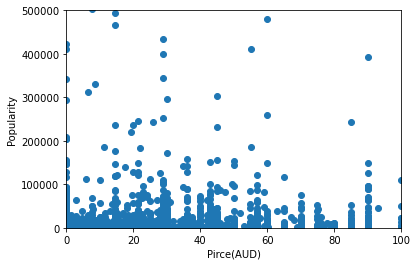

In [33]:
x=steam_game_df['Final_price']
y=steam_game_df['positive']+steam_game_df['negative']
plt.scatter(x,y)
plt.xlim(0,100)
plt.ylim(0,500000)
plt.xlabel('Pirce(AUD)')
plt.ylabel('Popularity')

The relationship between price and popularity is weak.

## The most successful publishers

In [34]:
publisher_df=steam_game_df[['publisher','positive','negative','Avg_playtime_tot','Avg_playtime_2weeks','Med_playtime_tot','Med_playtime_2weeks']].groupby('publisher').sum()
publisher_df['tot_comments']=publisher_df['positive']+publisher_df['negative']
publisher_df['positive_rate']=publisher_df['positive']/publisher_df['tot_comments']

In [35]:
publisher_df.sort_values('tot_comments',ascending=False,inplace=True)
publisher_df.head(10)

,positive,negative,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,tot_comments,positive_rate
publisher,,,,,,,,
Valve,8853484,1005844,116959,8381,16350,5388,9859328,0.897980
Ubisoft,1916997,372744,106169,8953,78184,9201,2289741,0.837211
Bethesda Softworks,1465835,209806,53251,7066,23269,7521,1675641,0.874791
"KRAFTON, Inc.",902511,768046,25513,672,11718,245,1670557,0.540246
CD PROJEKT RED,799972,101465,9039,1331,4021,492,901437,0.887441
Devolver Digital,753706,97291,19559,1342,18704,1357,850997,0.885674
Electronic Arts,738670,112101,55182,13392,42924,13754,850771,0.868236
Paradox Interactive,731387,99927,83541,3589,46379,3830,831314,0.879796
Xbox Game Studios,703058,78495,30890,7537,22223,9042,781553,0.899565


The publishers who sell most games are (1) Valve; (2) Ubisoft; (3) Bethesda Softworks; (4) KRAFTON, Inc. and (5) CD PROJEKT RED.
Among the top 10 publihsers, Re-Logic/Xbox Game Studios/Valve have  the bset reputations

## The most popular genres

In [36]:
# get the genre list
genre_list=[]
for x in steam_game_df['genres']:
    for y in x:
        if y not in genre_list:
            genre_list.append(y)

# Set the info need to collect
for x in genre_list:
    x['num']=0
    x['Avg_positive']=0
    x['Avg_negative']=0
    x['Avg_playtime_tot']=0
    x['Avg_playtime_2weeks']=0
    x['Med_playtime_tot']=0
    x['Med_playtime_2weeks']=0

# Get the info from dataframe
for index, row in steam_game_df.iterrows():
    for x in row['genres']:
        for y in genre_list:
            if y['id'] == x['id']:
                y['num'] += 1
                y['Avg_positive'] += row['positive']
                y['Avg_negative'] += row['negative']
                y['Avg_playtime_tot'] += row['Avg_playtime_tot']
                y['Avg_playtime_2weeks'] += row['Avg_playtime_2weeks']
                y['Med_playtime_tot'] += row['Med_playtime_tot']
                y['Med_playtime_2weeks'] += row['Med_playtime_2weeks']

genre_df=pd.DataFrame(genre_list)
genre_df.drop_duplicates(subset=['id'],inplace=True)
genre_df.sort_values('num',ascending=False,inplace=True)
genre_df['Avg_positive']=round(genre_df['Avg_positive']/genre_df['num'],1)
genre_df['Avg_negative']=round(genre_df['Avg_negative']/genre_df['num'],1)
genre_df['Avg_comments']=round(genre_df['Avg_positive']+genre_df['Avg_negative'],1)
genre_df['positive_rate']=round(genre_df['Avg_positive']/genre_df['Avg_comments'],2)
genre_df.reset_index(drop=True,inplace=True)
genre_df

,id,description,num,Avg_positive,Avg_negative,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,Avg_comments,positive_rate
0,23,Indie,5354,3685.6,455.5,1706115,122843,1557306,126982,4141.1,0.89
1,1,Action,3930,8840.4,1550.6,1921614,185391,1416326,190554,10391.0,0.85
2,25,Adventure,3324,5066.9,970.5,1363126,128129,1166435,128982,6037.4,0.84
3,4,Casual,2364,2462.2,326.5,684075,48040,653453,48289,2788.7,0.88
4,2,Strategy,2128,4117.7,698.8,1274062,94220,1107340,101401,4816.5,0.85
5,3,Rol,1908,6244.9,992.5,1509546,135654,1402554,145869,7237.4,0.86
6,28,Simulation,1734,5372.4,782.4,1192432,103220,1022826,109059,6154.8,0.87
7,37,Free to Play,1555,8256.7,1479.9,603133,63235,259399,63453,9736.6,0.85
8,70,Early Access,617,4185.9,703.4,359205,42421,356130,43231,4889.3,0.86
9,29,Massively Multiplayer,513,9679.4,3934.4,642151,59069,440169,60404,13613.8,0.71


Text(0.5, 1.0, 'Genres vs Number of games')

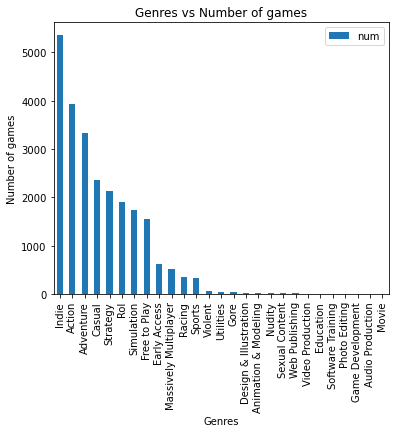

In [37]:
genre_df.sort_values('num',ascending=False,inplace=True)
ax1=genre_df.plot.bar(x='description',y='num',rot=90,figsize=(6,5))
ax1.set_xlabel('Genres')
ax1.set_ylabel('Number of games')
ax1.set_title('Genres vs Number of games')

The top 3 groups of game genres are Inidie game, Action and Adventure.

Text(0.5, 1.0, 'Genres vs Number of comments')

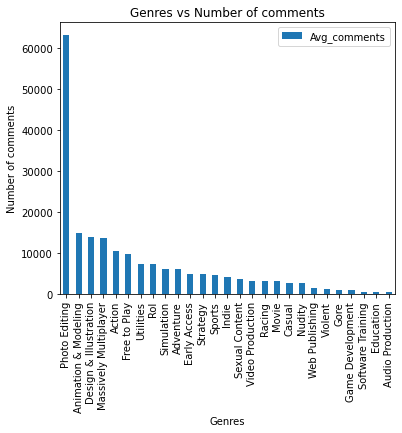

In [38]:
genre_df.sort_values('Avg_comments',ascending=False,inplace=True)
ax1=genre_df.plot.bar(x='description',y='Avg_comments',rot=90,figsize=(6,5))
ax1.set_xlabel('Genres')
ax1.set_ylabel('Number of comments')
ax1.set_title('Genres vs Number of comments')

The top 3 genres which get most comments are Photo Editing, Animation & Modeling and Design & Illustration.

Text(0.5, 1.0, 'Genres vs Rate of positive comment')

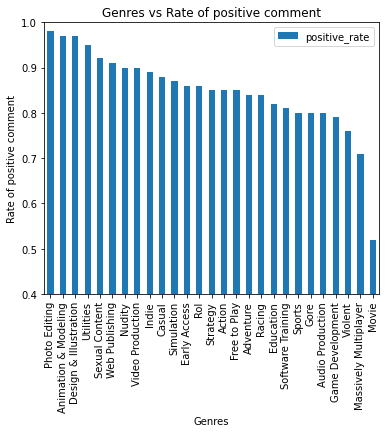

In [39]:
genre_df.sort_values('positive_rate',ascending=False,inplace=True)
ax1=genre_df.plot.bar(x='description',y='positive_rate',rot=90,figsize=(6,5))
ax1.set_xlabel('Genres')
ax1.set_ylabel('Rate of positive comment')
ax1.set_ylim(0.4,1.0)
ax1.set_title('Genres vs Rate of positive comment')

The top 3 genres which get best reputations are Photo Editing, Animation & Modeling and Design & Illustration.

## Size of Concurrent players

In [40]:
steam_game_df.sort_values('ccu', ascending=False).head(5)

,appid,name,developer,publisher,positive,negative,owners,Avg_playtime_tot,Avg_playtime_2weeks,Med_playtime_tot,Med_playtime_2weeks,ccu,type,is_free,categories,genres,recommendations,coming_soon,date,currency,Final_price,Initial_price
1,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,4698693,633657,"50,000,000 .. 100,000,000",29044,974,8180,407,1030379,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",3013382.0,False,"21 Aug, 2012",AUD,0.00,0.00
0,570,Dota 2,Valve,Valve,1231949,228624,"100,000,000 .. 200,000,000",34674,1535,1013,718,509412,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action', 'num': 3...",14613.0,False,"9 Jul, 2013",AUD,0.00,0.00
30,892970,Valheim,Iron Gate AB,Coffee Stain Publishing,106320,3988,"10,000,000 .. 20,000,000",1658,1582,990,973,311845,game,0.0,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...",102810.0,False,"2 Feb, 2021",AUD,28.95,28.95
3,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",901900,767516,"50,000,000 .. 100,000,000",25442,672,11647,245,227673,game,0.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",1394065.0,False,"21 Dec, 2017",AUD,42.95,42.95
18,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,135003,11422,"10,000,000 .. 20,000,000",1915,908,337,344,142908,game,1.0,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...",169.0,False,"4 Nov, 2020",AUD,0.00,0.00


The games which currently have most online users are (1) CS; (2) Dota; (3) Valheim; (4) PLAYERUNKNOWN'S BATTLEGROUNDS and (5) Apex Legends.